# Explore Wavelet Transform with pywt

In order to acquire a good theoretical foundation on the topic of wavelet transform, I found useful information here: 
    
    https://www.youtube.com/watch?v=i0rPaAXjJoI

    Rubin H. Landau et al., 2015, Computational Physics (third edition), Wiley-VCH, pp. 307-319.

I found it helpful to familiarize myself with the Concept of Fourier Transform first. I found useful information here: 
    
    https://www.youtube.com/watch?v=spUNpyF58BY
        
    James H. McClellan et al., 2003, Signal Processing First (International Edition), Pearson Education International, pp. 1-50.
    
Many useful algorithms can be found here:  https://github.com/PyWavelets/pywt/blob/master/demo/
some of which are used in the present notebook. 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab
import pywt
#from intra_event_processing.data_processing.autocorrelation import autocorr_non_norm, autocorr_norm
#from intra_event_processing.data_visualization.show_dic_structure import show_structure

## Extracting higher frequencies from a signal: 

### Create some test data:

#### Two sine wave signals, the second with a frequency four times as high as the first one:

c:\users\hessst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


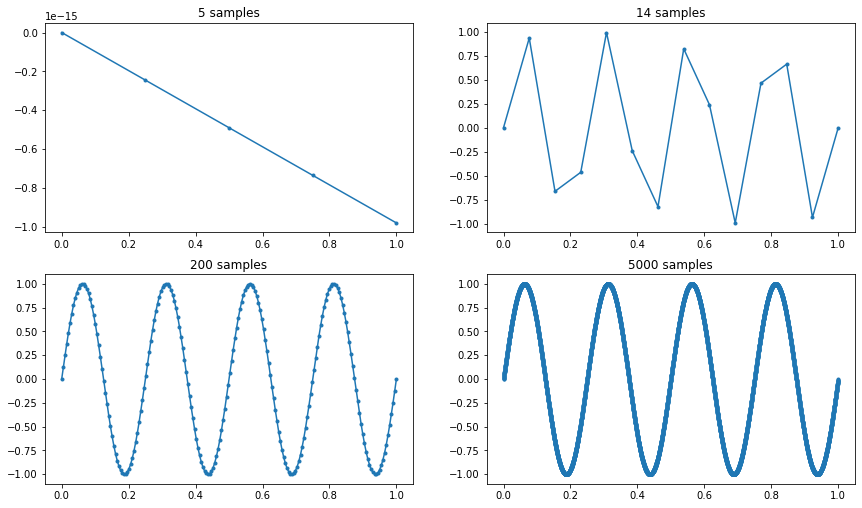

In [2]:
f_1 = 4
w = 2. * np.pi * f_1
time_interval = 1
fig = pylab.figure()
signals_lowfreq = {}
for i, samples in enumerate((5, 14, 200, 5000)):
    pylab.subplot(2, 2, i+1)
    pylab.title('%i samples'%samples)
    t = np.linspace(0, time_interval, samples)
    y = np.sin(w * t)
    data_points = str(samples) + '_points'
    signals_lowfreq[data_points] = y
    pylab.plot(t, y, '.-')
    plt.subplots_adjust(bottom=0.4, right=2, top=2)
fig.show()

c:\users\hessst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


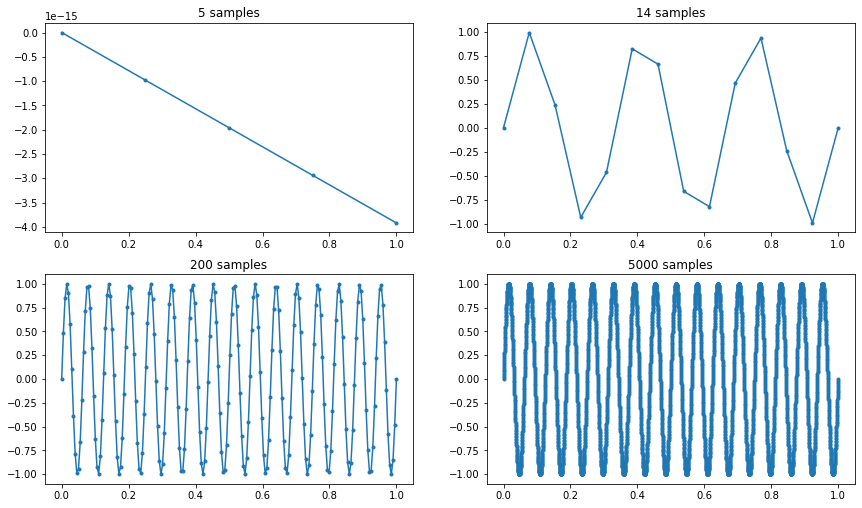

In [3]:
f_2 = f_1*4
w = 2. * np.pi * f_2
time_interval = 1
fig = pylab.figure()
signals_highfreq = {}
for i, samples in enumerate((5, 14, 200, 5000)):
    pylab.subplot(2, 2, i+1)
    pylab.title('%i samples'%samples)
    t = np.linspace(0, time_interval, samples)
    y = np.sin(w * t)
    data_points = str(samples) + '_points'
    signals_highfreq[data_points] = y
    pylab.plot(t, y, '.-')
    plt.subplots_adjust(bottom=0.4, right=2, top=2)
fig.show()

In [4]:
sine_wave_low = signals_lowfreq['200_points']
sine_wave_high = signals_highfreq['200_points']

## Discrete wavelet transform: 

### How to decompose a signal into components containing different frequencies:

#### Create a signal by adding the two above signals: constant low frequency plus a mixed signal (constant in the first part and high frequency in the second part):

In [5]:
zero_streak = np.zeros(100)
zero_high = np.concatenate((zero_streak,signals_highfreq['200_points'][100:]))
len(zero_high)

200

c:\users\hessst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


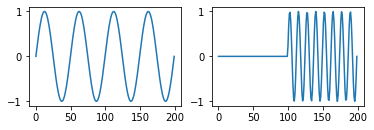

In [6]:
sine_wave_low = signals_lowfreq['200_points']
sine_wave_high = signals_highfreq['200_points']

pylab.subplot(2,2,1)
pylab.plot(sine_wave_low)
pylab.subplot(2,2,2)
pylab.plot(zero_high)
fig.show()

In [7]:
signal_mixed_half = signals_lowfreq['200_points'] + zero_high

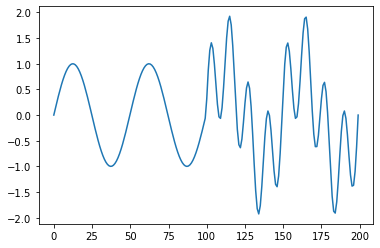

In [8]:
plt.plot(signal_mixed_half)

#### Task: Decompose the mixed signal (signal_mixed_half) in order to reconstract the original low frequency signal (sine_wave_low):

Visualize frequency composition using discrete wavelet transform: 

The following code is taken from: https://github.com/PyWavelets/pywt/blob/master/demo/dwt_signal_decomposition.py

In [18]:
mode = pywt.Modes.smooth

def plot_signal_decomp(data, w, title):
    """Decompose and plot a signal S.
    S = An + Dn + Dn-1 + ... + D1
    """
    w = pywt.Wavelet(w)
    a = data
    ca = []
    cd = []
    for i in range(10):
        (a, d) = pywt.dwt(a, w, mode)
        ca.append(a)
        cd.append(d)

    rec_a = []
    rec_d = []

    for i, coeff in enumerate(ca):
        coeff_list = [coeff, None] + [None] * i
        rec_a.append(pywt.waverec(coeff_list, w))

    for i, coeff in enumerate(cd):
        coeff_list = [None, coeff] + [None] * i
        rec_d.append(pywt.waverec(coeff_list, w))

    fig = plt.figure(figsize=(20,10))
    ax_main = fig.add_subplot(len(rec_a) + 1, 1, 1)
    ax_main.set_title(title)
    ax_main.plot(data)
    ax_main.set_xlim(0, len(data) - 1)

    for i, y in enumerate(rec_a):
        ax = fig.add_subplot(len(rec_a) + 1, 2, 3 + i * 2)
        ax.plot(y, 'r')
        ax.set_xlim(0, len(y) - 1)
        ax.set_ylabel("A%d" % (i + 1))

    for i, y in enumerate(rec_d):
        ax = fig.add_subplot(len(rec_d) + 1, 2, 4 + i * 2)
        ax.plot(y, 'g')
        ax.set_xlim(0, len(y) - 1)
        ax.set_ylabel("D%d" % (i + 1))

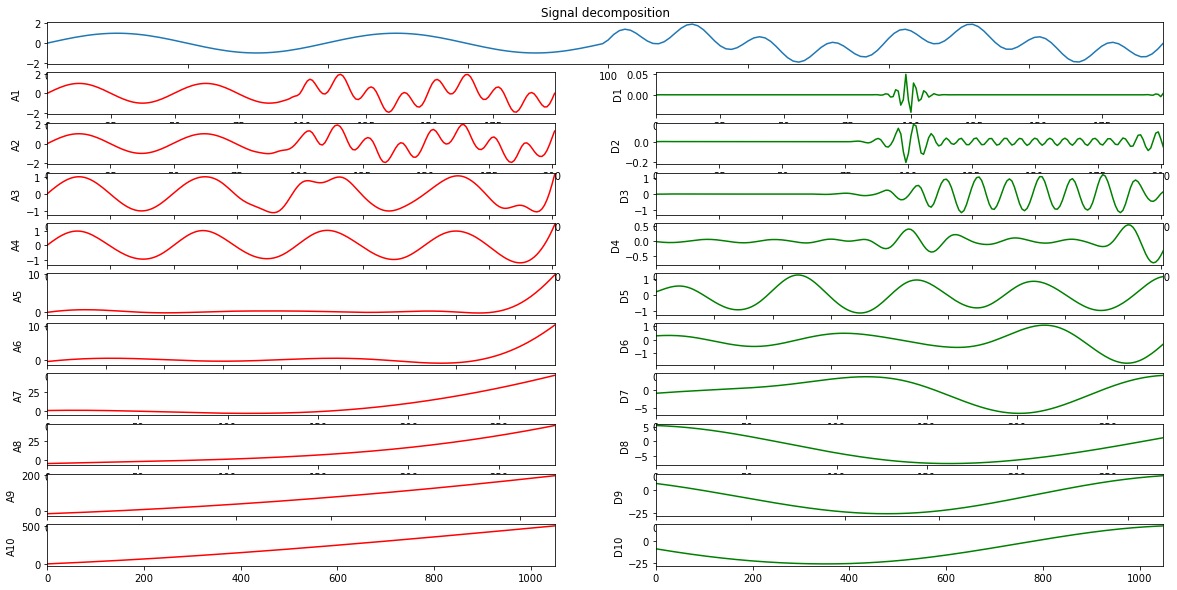

In [10]:
plot_signal_decomp(signal_mixed_half, 'sym14', "Signal decomposition")

#### Decomposing the signal using discrete wavelet transform:
The code below executes the same operation that is visualized above.

In [30]:
def dwt_steps(a, w, mode, num_steps):
    ca = []
    cd = []
    for i in range(num_steps + 1):
        (a, d) = pywt.dwt(a, w, mode)
        ca.append(a)
        cd.append(d)
    return ca, cd

In [31]:
w = 'sym14'
mode = pywt.Modes.smooth
ca, cd = dwt_steps(signal_mixed_half, w, mode, 10)

#### Reonstructing the signal from the estimates:

In [32]:
rec_a = []
rec_d = []

for i, coeff in enumerate(ca):
    coeff_list = [coeff, None] + [None] * i
    rec_a.append(pywt.waverec(coeff_list, w))

for i, coeff in enumerate(cd):
    coeff_list = [None, coeff] + [None] * i
    rec_d.append(pywt.waverec(coeff_list, w))

In [47]:
low_freq_rec = rec_a[2]
high_freq_rec = rec_d[2]
signal_mixed_half_rec = low_freq_rec + high_freq_rec

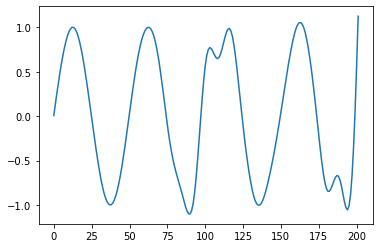

In [48]:
plt.plot(low_freq_rec)

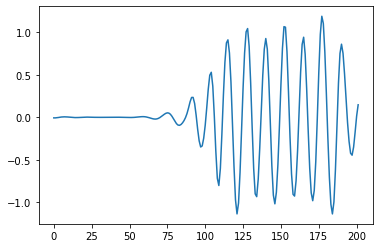

In [49]:
plt.plot(high_freq_rec)

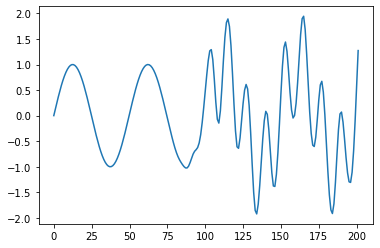

In [50]:
plt.plot(signal_mixed_half_rec)

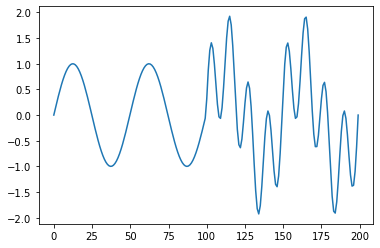

In [43]:
plt.plot(signal_mixed_half)

In [51]:
low_freq_rec_trunc = rec_a[2][:200]

In [52]:
high_freq_rec_indirect = signal_mixed_half - low_freq_rec_trunc

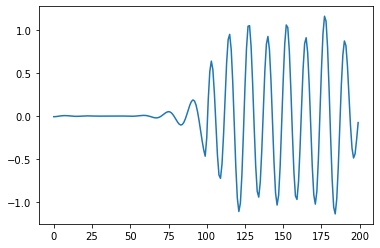

In [55]:
plt.plot(high_freq_rec_indirect)

#### The two signal components reconstructed by wavelet transform look quite similar to the two original signal components that were used to create the mixed signal: 

c:\users\hessst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


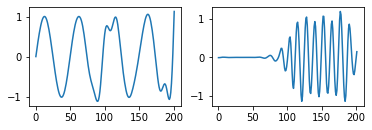

In [53]:
pylab.subplot(2,2,1)
pylab.plot(low_freq_rec)
pylab.subplot(2,2,2)
pylab.plot(high_freq_rec)
fig.show()

c:\users\hessst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


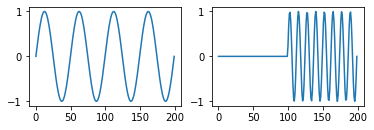

In [54]:
pylab.subplot(2,2,1)
pylab.plot(sine_wave_low)
pylab.subplot(2,2,2)
pylab.plot(zero_high)
fig.show()